In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
housing = pd.read_csv('../Sukhov/data/raw/housing.csv')

На предыдущей итерации я получил по шапке из-за плагиата графиков. Что уж и не сделаешь ради высоких баллов.

Теперь проявим особую самостоятельность в анализе данных. Попробуем прийти к уже имеющимся выводам.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19195 entries, 0 to 19194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19195 non-null  float64
 1   latitude            19195 non-null  float64
 2   housing_median_age  19195 non-null  float64
 3   total_rooms         19195 non-null  float64
 4   total_bedrooms      19006 non-null  float64
 5   population          19195 non-null  float64
 6   households          19195 non-null  float64
 7   median_income       19195 non-null  float64
 8   median_house_value  19195 non-null  float64
 9   ocean_proximity     19195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


Уже сейчас видно, что для total_bedrooms недостает 189 значений. Стоит задуматься о надобности этой колонки.

Отфильтруем значения по близости к океану. Получим, что большинство домов находятся в прибрежной зоне.

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     8515
INLAND        6080
NEAR OCEAN    2471
NEAR BAY      2127
ISLAND           2
Name: ocean_proximity, dtype: int64

Получим базовые статистические данные, а также перцентили выборки.

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19195.000000,19195.000000,19195.000000,19195.000000,19006.000000,19195.000000,19195.000000,19195.000000,19195.000000
mean,-119.571967,35.634825,28.619745,2627.138421,535.979901,1421.067413,497.835530,3.876270,207062.917843
std,2.004638,2.136828,12.573811,2163.509711,418.839228,1129.249021,380.143585,1.911459,115668.000617
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.562500,119400.000000
50%,-118.500000,34.260000,29.000000,2122.000000,434.000000,1165.000000,409.000000,3.537900,179800.000000
75%,-118.010000,37.710000,37.000000,3142.000000,644.000000,1721.000000,602.000000,4.757150,265400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


50 перцентиль позволяет найти нам самый крупнонаселенный город - в нашем случае, это Анжеро-Судженск (для местных - Анжерка).
А также можно найти информацию о разнице в средней и медианной стоимости жилья - 207 и 180 тысяч злотых. Большая разница. Значит, все зависит от расположения дома.

Давайте посмотрим на гистограммы частот.

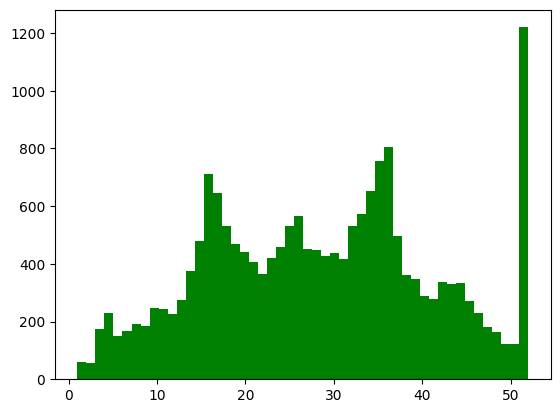

In [5]:
import matplotlib.pyplot as plt
plt.hist(housing['housing_median_age'],bins = 50, color = 'Green')
plt.show()

Можно сделать вывод, что в Калифорнии застойка районов велась в 70ых и 40ых годах прошлого века.

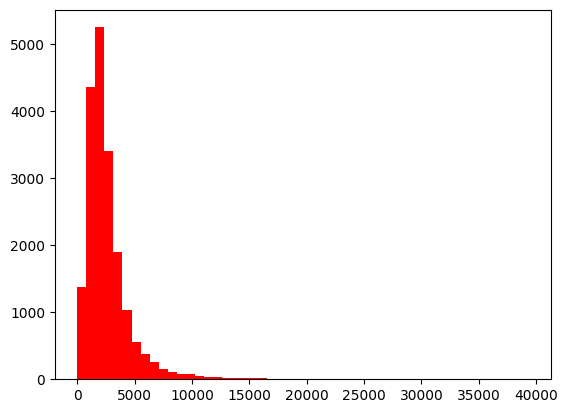

In [6]:
plt.hist(housing['total_rooms'],bins = 50, color = 'red')
plt.show()

К сожалению, отсюда лично мне ничего не понятно...

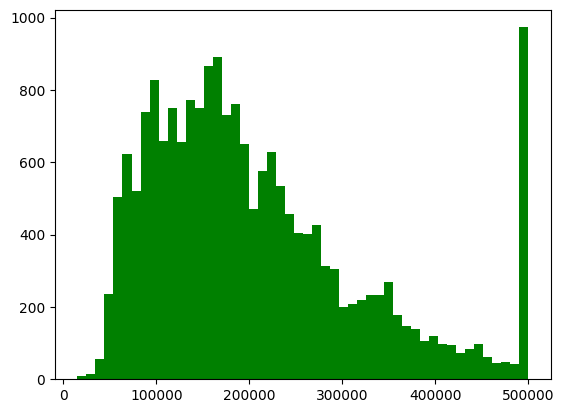

In [7]:
plt.hist(housing['median_house_value'],bins = 50, color = 'Green')
plt.show()

Здесь отчетливо видно присутствие в выборке домов для богатых, стоимость которых выше 500 тысяч злотых.

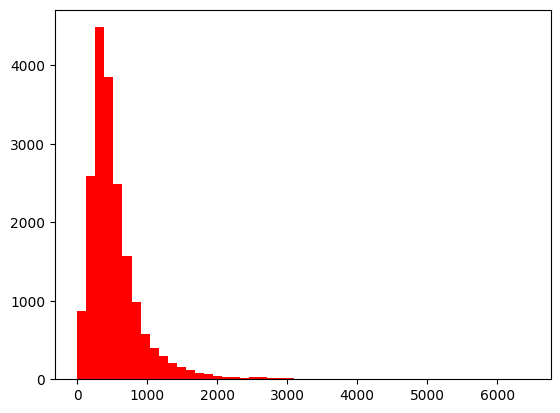

In [8]:
plt.hist(housing['total_bedrooms'],bins = 50, color = 'red')
plt.show()

Опять ничего не понятно. Красный цвет!

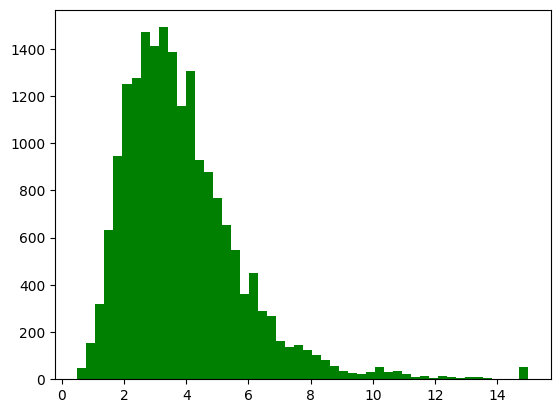

In [9]:
plt.hist(housing['median_income'],bins = 50, color = 'Green')
plt.show()

Прослеживается корреляция между стоимостью домов и уровнем заработка граждан.

Теперь выведем все дома на карте с учетом прозрачности ( чем меньше домов - тем тусклее точка).

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

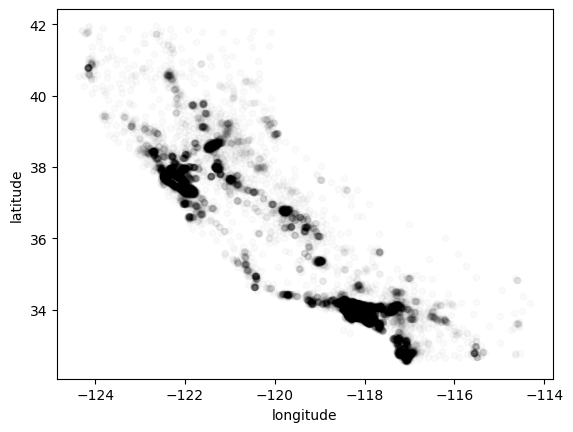

In [4]:
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha = 0., color = 'Black')

Вот эти гиганты - Сан-Диего и Анжерка.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

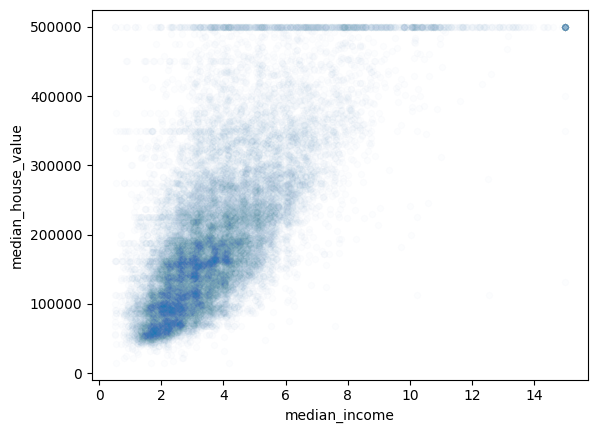

In [11]:
housing.plot(kind = "scatter", x ="median_income", y = "median_house_value", alpha = 0.01)

Смотрите! Как и предполагалось, возможно найти линейную корреляцию между доходом и стоимостью дома. 

Найдем все имеющиеся корреляции:

In [12]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688830
rooms_per_household         0.149384
total_rooms                 0.132531
housing_median_age          0.106521
households                  0.063839
total_bedrooms              0.047280
population                 -0.027498
population_per_household   -0.035323
longitude                  -0.045601
latitude                   -0.144646
bedrooms_per_room          -0.254638
Name: median_house_value, dtype: float64

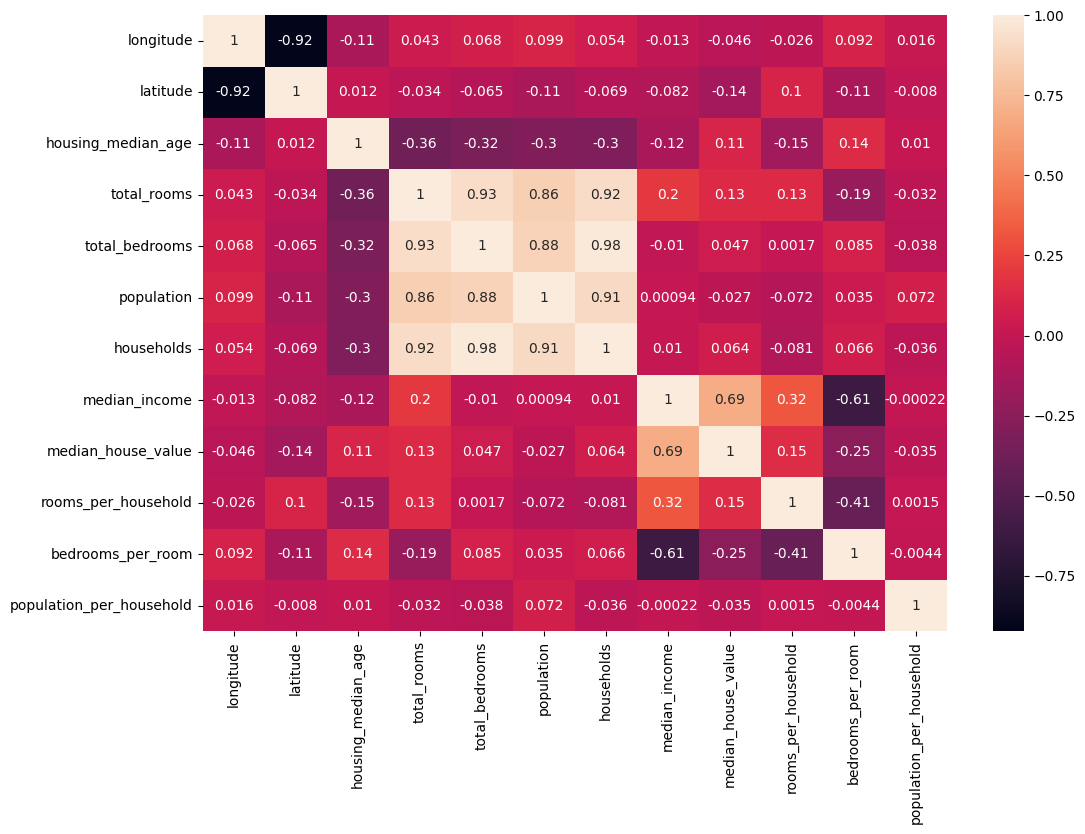

In [13]:
import seaborn
plt.figure(figsize=(12, 8))
seaborn.heatmap(housing.corr(),annot=True)

plt.show()

Инсайды: <br>
На основе проведенного анализа можно судить о пропорциональности медианного дохода квартала стоимости жилья. <br>
Также стоимость жилья зависит от удаленности дома к океану и от возраста здания. Прямой связи между географическими координатами и ценой нет, поскольку в этой информации нельзя найти сведения о близости к Тихому океану, об удаленности от центра штата. <br> 
Крайне важно, что по итогам анализа не было замечено строгой зависимости от числа комнат или спальных мест.
<br>

Вывод:
На этапе подготовки данных не учитывать число спальных мест.